# Assignment 2 and 3
### By Aditya Sharma (Student Id - 3164310)




## Table of Contents 
1. [Part 1: Analytical/Business Questions](#Part-1:-Analytical/Business-Questions)
2. [Part 2: Data  Understanding](#Part-2:-Data-Understanding)
    - [2.1 Features of the dataset](#2.1-Features-of-the-dataset)
    - [2.2 Identifying Missing or incomplete data](#2.2-Identifying-Missing-or-incomplete-data)
    - [2.3 Identifying Outliers or anomalies in data](#2.3-Identifying-Outliers-or-anomalies-in-data)
    - [2.4 Compute basic statistics (mean, median, standard deviation, etc.)](#2.4-Compute-basic-statistics-(mean,-median,-standard-deviation,-etc.))
    - [2.5 Compute the frequency counts and percentage distributions for all the qualitative features](#2.5-Compute-the-frequency-counts-and-percentage-distributions-for-all-the-qualitative-features)
    - [2.6 Visualizing the distribution of all the quantitative features](#2.6---Visualizing-the-distribution-of-all-the-quantitative-features)
    - [2.7 Relationships between the features in the dataset](#2.7-Relationships-between-the-features-in-the-dataset)
3. [Part 3: Data Preparation](#Part-3:-Data-Preparation)
    - [3.1 Check for missing or incomplete data and handle it appropriately](#3.1-Check-for-missing-or-incomplete-data-and-handle-it-appropriately)
    - [3.2 Data transformation to answer analytical/business questions](#3.2-Data-transformation-to-answer-analytical/business-questions)
    - [3.3 Data visualization](#3.3-Data-visualization)
    - [3.4 Reasoning for selection of plot](#3.4-Reasoning-for-selection-of-plot)


# Part 1: Analytical/Business Questions

1. Which types of transactions are fraudulent?
2. What is the distribution of fraud vs non-fraud transactions in the dataset?


# Part 2: Data Understanding

### 2.1 Features of the dataset

The imported dataset is taken from kaggle, this dataset is presently only one of very few on Kaggle with information on the rising risk of digital financial fraud, emphasizing the difficulty in obtaining such data. The data has 6362620 rows and 11 columns.


Data Source: https://www.kaggle.com/datasets/arunavakrchakraborty/financial-payment-services-fraud-data

#### Below is the description of the database.

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction.

**newbalanceDest** - new balance recipient after the transaction.

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts.


#### Importing Packages
Here, required Python packages have been imported for the analysis.

1. The pandas, numpy packages are required for basic analysis.
2. The matplotlib, seaborn packages are used for visualization purpose.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [2]:
df = pd.read_csv('./data/transactions.csv')

#### Explore the dataset

In [3]:
# Check the first few rows of the dataset
df.head().T # Used DataFrame.T property to transpose index and columns of the data frame.

,0,1,2,3,4
step,1,1,1,1,1
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT
amount,9839.64,1864.28,181.0,181.0,11668.14
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720
oldbalanceOrg,170136.0,21249.0,181.0,181.0,41554.0
newbalanceOrig,160296.36,19384.72,0.0,0.0,29885.86
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703
oldbalanceDest,0.0,0.0,0.0,21182.0,0.0
newbalanceDest,0.0,0.0,0.0,0.0,0.0
isFraud,0,0,1,1,0


In [4]:
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Observations

Using info and describe function we have identified the data types of all the columns, now we can select all the columns which are under categorical and Quantitative data.

#### Categorical Columns

1. type
2. nameOrig
3. isFraud
4. isFlaggedFraud

#### Quantitative Columns

1. step
2. amount
3. oldbalanceOrg
4. newbalanceOrig
5. oldbalanceDest
6. newbalanceDest

As columns "isFlaggedFraud" and "isFraud" only contain two values 0 and 1 as they are boolean values, they cannot be categorized under Quantitative data.

### 2.2 Identifying Missing or incomplete data

In [6]:
df.isnull().values.any()

False

In [7]:
df.isna().sum().sort_values(ascending=False)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Observations

As we observed using isna and isnull functions that there are no empty rows in entire dataset. So, the data cleaning is not required for this dataset. However, in order to clean data we can use below techniques:

1. Fill missing values with mean value in quantitative columns.
2. For categorical columns, we can use following strategies:
    - For large number of rows having missing values, we can delete the rows.
    - For few number of rows having missing values we fill with highest frequency for that column.

In [8]:
# To fill quantitative columns having missing values with mean values.
cols = ['amount', 'step']
for item in cols:
    mean_val = df[item].mean()
    df[item].fillna(value=mean_val, inplace=True)

# To fill categorical columns having missing values with highest frequency.
cat_cols = ['type', 'nameOrig']
for item in cat_cols:
    highest_freq = df[item].max()
    df[item].fillna(value=highest_freq, inplace=True)

### 2.3 Identifying Outliers or anomalies in data

#### 2.3.1 Outliers from the Amount of the Transaction

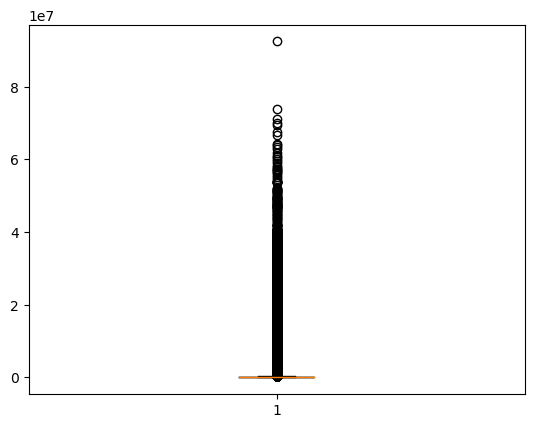

In [9]:
plt.boxplot(df['amount'])
plt.show()

In [10]:
df.query('amount>80000000').T # Used DataFrame.T property to transpose index and columns of the data frame.

,3686583
step,276
type,TRANSFER
amount,92445516.64
nameOrig,C1715283297
oldbalanceOrg,0.0
newbalanceOrig,0.0
nameDest,C439737079
oldbalanceDest,9595.98
newbalanceDest,92455112.62
isFraud,0


In [11]:
indexNames = df[df['amount'] > 80000000].index
df.drop(indexNames , inplace=True)

### Observations
During the analysis, one outlier has been found for the amount feature with a value of greater than 80000000. The outlier has been removed from the dataset.

#### 2.3.2 Outliers from Initial Balance Before the Transaction

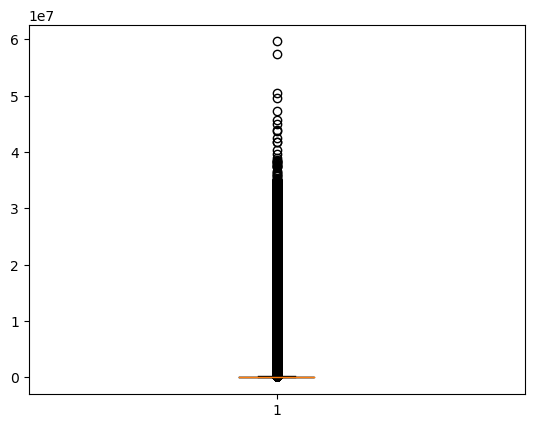

In [12]:
plt.boxplot(df['oldbalanceOrg'])
plt.show()

In [13]:
df.query('oldbalanceOrg>50000000').T # Used DataFrame.T property to transpose index and columns of the data frame.

,5996399,6281474,6362452
step,425,646,730
type,TRANSFER,TRANSFER,TRANSFER
amount,10000000.0,10000000.0,10000000.0
nameOrig,C40489106,C590657619,C726730575
oldbalanceOrg,59585040.37,50399045.08,57316255.05
newbalanceOrig,49585040.37,40399045.08,47316255.05
nameDest,C650095152,C1971187430,C1364745638
oldbalanceDest,0.0,0.0,0.0
newbalanceDest,0.0,0.0,0.0
isFraud,1,1,1


In [14]:
indexNames = df[df['oldbalanceOrg'] > 50000000].index
df.drop(indexNames , inplace=True)

### Observations
During the analysis, three outliers have been found for the oldbalanceOrg feature with a value of greater than 50000000. The outliers have been removed from the dataset.


#### 2.3.3 Outliers from New Balance After the Transaction

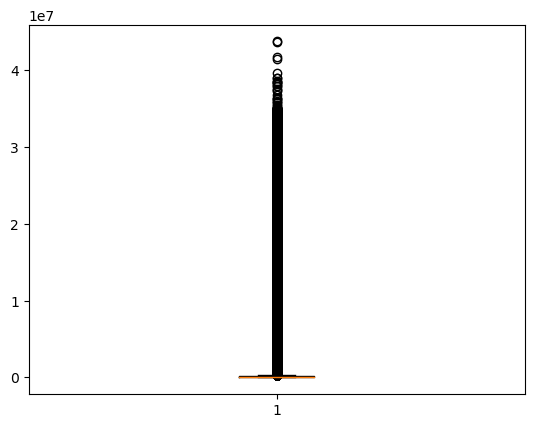

In [15]:
plt.boxplot(df['newbalanceOrig'])
plt.show()

In [16]:
df.query('newbalanceOrig>40000000').T # Used DataFrame.T property to transpose index and columns of the data frame.

,4180200,4180201,4203639,4203640
step,304,304,305,305
type,PAYMENT,CASH_OUT,CASH_OUT,PAYMENT
amount,8301.85,258483.17,132238.97,12814.12
nameOrig,C1568160039,C438977024,C559275248,C2080486364
oldbalanceOrg,41699144.49,41690842.64,43818855.3,43686616.33
newbalanceOrig,41690842.64,41432359.46,43686616.33,43673802.21
nameDest,M1906748245,C1162702437,C1114436169,M928977012
oldbalanceDest,0.0,6449276.06,5327024.57,0.0
newbalanceDest,0.0,6707759.23,5459263.54,0.0
isFraud,0,0,0,0


In [17]:
indexNames = df[df['newbalanceOrig'] > 40000000].index
df.drop(indexNames , inplace=True)

### Observations
During the analysis, four outliers have been found for the newbalanceOrig feature with a value of greater than 40000000. The outliers have been removed from the dataset.

### 2.4 Compute basic statistics (mean, median, standard deviation, etc.)

In [18]:
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362612e+06  6.362612e+06   6.362612e+06    6.362612e+06   
mean   2.433970e+02  1.798428e+05   8.338310e+05    8.550664e+05   
std    1.423318e+02  6.027120e+05   2.887806e+06    2.923699e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487165e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087213e+05   1.073150e+05    1.442573e+05   
max    7.430000e+02  7.382349e+07   4.958504e+07    3.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362612e+06    6.362612e+06  6.362612e+06    6.362612e+06  
mean     1.100701e+06    1.224981e+06  1.290351e-03    2.514691e-06  
std      3.399181e+06    3.673952e+06  3.589827e-02    1.585776e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

### Observations
As we can see above, by using DataFrame describe function we can identify the mean, median, standard deviation, min and max values for each column.

### 2.5 Compute the frequency counts and percentage distributions for all the qualitative features

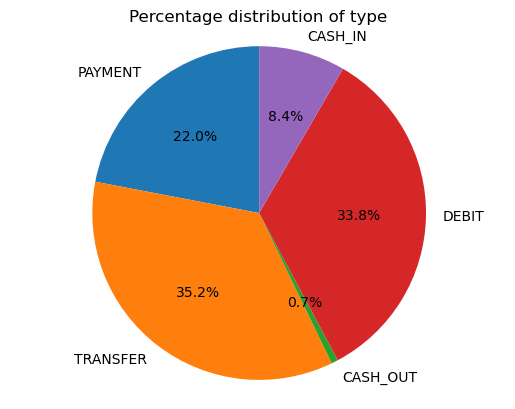

In [19]:
labels = df['type'].unique()
plt.pie(df.groupby('type').size(), labels=labels, autopct='%1.1f%%', startangle=90)

# Aspect ratio
plt.axis('equal')
plt.title("Percentage distribution of type")

# Show plot
plt.show()

In [20]:
# To get the frequency counts
print(df['type'].value_counts().head())

CASH_OUT    2237498
PAYMENT     2151493
CASH_IN     1399284
TRANSFER     532905
DEBIT         41432
Name: type, dtype: int64


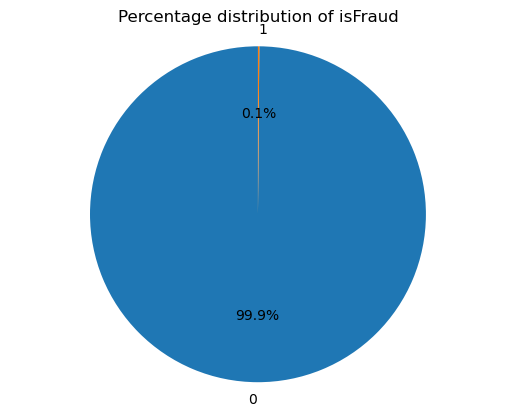

In [21]:
labels = df['isFraud'].unique()
plt.pie(df.groupby('isFraud').size(), labels=labels, autopct='%1.1f%%', startangle=90)

# Aspect ratio
plt.axis('equal')
plt.title("Percentage distribution of isFraud")

# Show plot
plt.show()

In [22]:
# To get the frequency counts
print(df['isFraud'].value_counts().head())

0    6354402
1       8210
Name: isFraud, dtype: int64


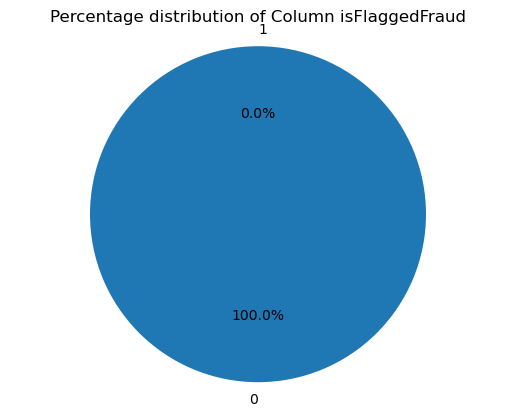

In [23]:
labels = df['isFlaggedFraud'].unique()
plt.pie(df.groupby('isFlaggedFraud').size(), labels=labels, autopct='%1.1f%%', startangle=90)

# Aspect ratio
plt.axis('equal')
plt.title("Percentage distribution of Column isFlaggedFraud")

# Show plot
plt.show()

In [24]:
# To get the frequency counts
print(df['isFlaggedFraud'].value_counts().head())

0    6362596
1         16
Name: isFlaggedFraud, dtype: int64


### Observations
1. **type** - From pie chart of column 'type' we can see that 'TRANSFER' has maximum 35.2 % distribution while 'CASH_OUT' has the least 0.7 % distribution.
2. **isFraud** - From pie chart of column 'isFraud' We analyse that 99.9 % transactions are not fraud.
3. **isFlaggedFraud** - From pie chart for column 'isFlaggedFraud' we can observe that no transaction was flagged as fraud.

### 2.6   Visualizing the distribution of all the quantitative features
For Quatitative data we use Histogram and Boxplot using matplotlib.


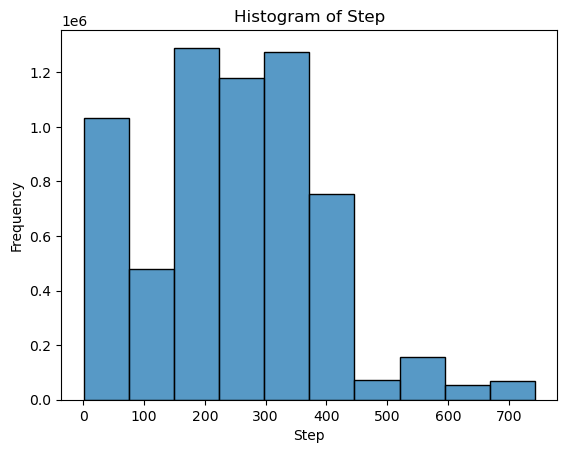

In [25]:
data = df['step']

# Create histogram with 10 bins
sns.histplot(data, bins=10)

# Set the title and axis labels
plt.title("Histogram of Step")
plt.xlabel("Step")
plt.ylabel("Frequency")

# Show the plot
plt.show()

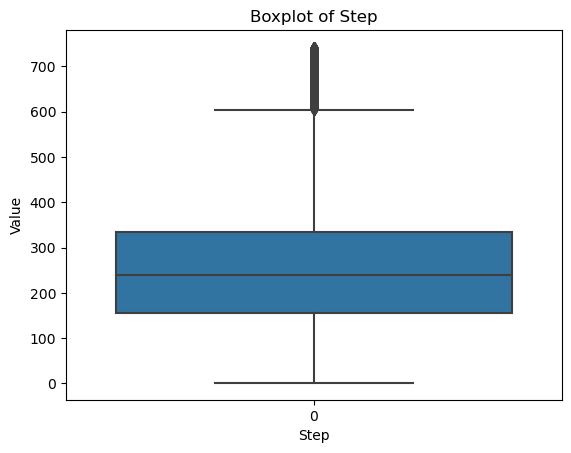

In [26]:
sns.boxplot(data=data)

# Set the title and axis labels
plt.title("Boxplot of Step")
plt.xlabel("Step")
plt.ylabel("Value")

# Show the plot
plt.show()

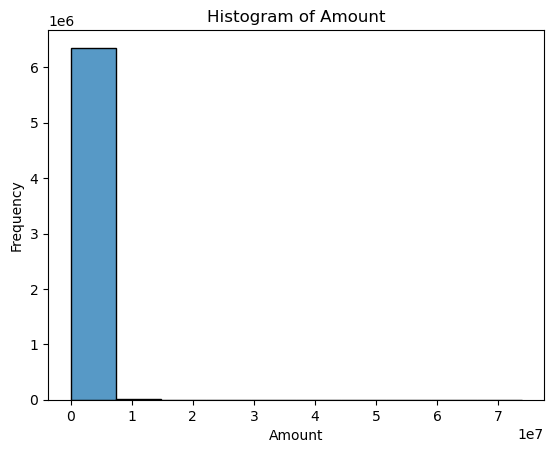

In [27]:
data = df['amount']

# Create histogram with 10 bins
sns.histplot(data, bins=10)

# Set the title and axis labels
plt.title("Histogram of Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")

# Show the plot
plt.show()

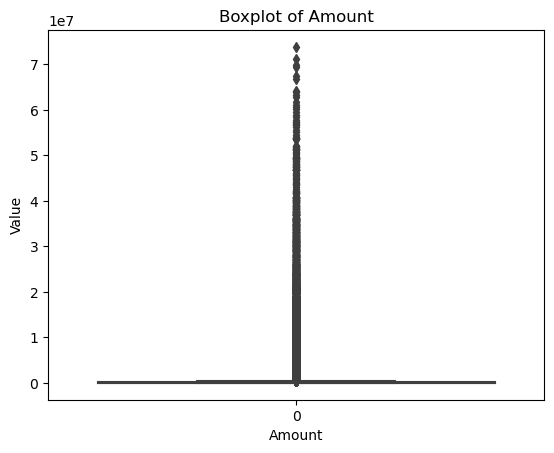

In [28]:
sns.boxplot(data=data)

# Set the title and axis labels
plt.title("Boxplot of Amount")
plt.xlabel("Amount")
plt.ylabel("Value")

# Show the plot
plt.show()

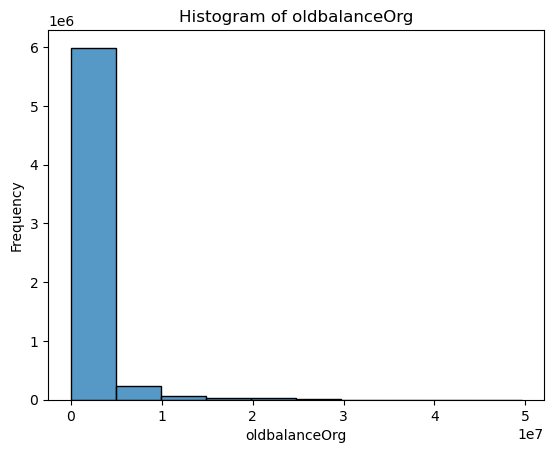

In [29]:
data = df['oldbalanceOrg']

# Create histogram with 10 bins
sns.histplot(data, bins=10)

# Set the title and axis labels
plt.title("Histogram of oldbalanceOrg")
plt.xlabel("oldbalanceOrg")
plt.ylabel("Frequency")

# Show the plot
plt.show()

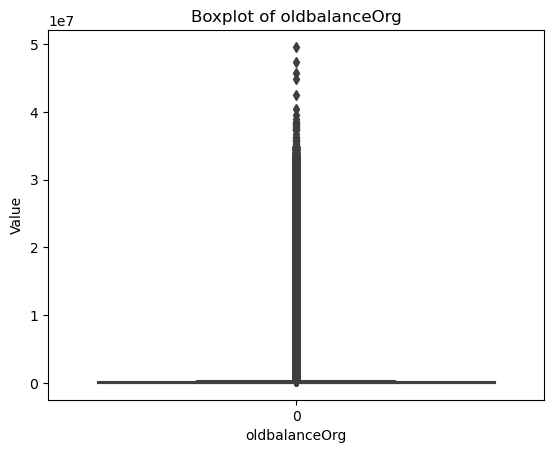

In [30]:
sns.boxplot(data=data)

# Set the title and axis labels
plt.title("Boxplot of oldbalanceOrg")
plt.xlabel("oldbalanceOrg")
plt.ylabel("Value")

# Show the plot
plt.show()

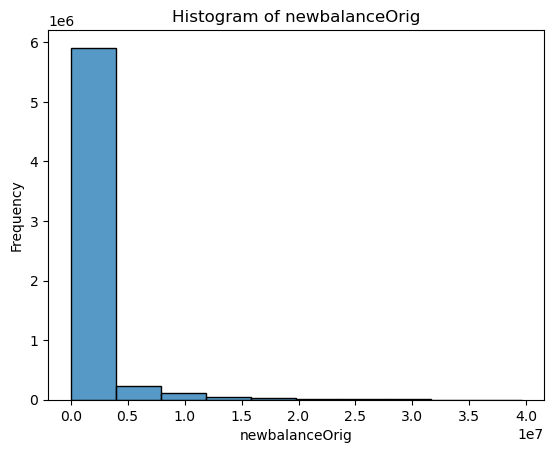

In [31]:
data = df['newbalanceOrig']

# Create histogram with 10 bins
sns.histplot(data, bins=10)

# Set the title and axis labels
plt.title("Histogram of newbalanceOrig")
plt.xlabel("newbalanceOrig")
plt.ylabel("Frequency")

# Show the plot
plt.show()

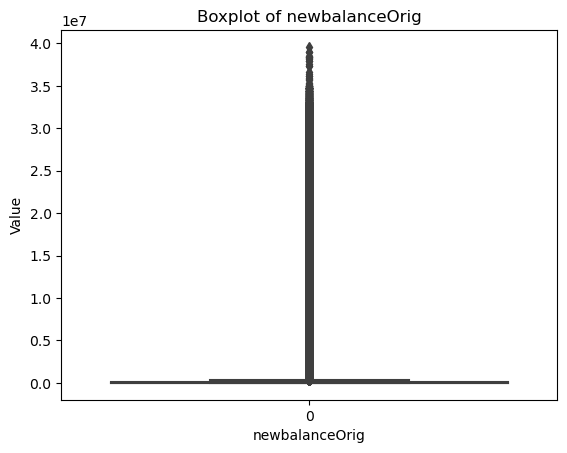

In [32]:
sns.boxplot(data=data)

# Set the title and axis labels
plt.title("Boxplot of newbalanceOrig")
plt.xlabel("newbalanceOrig")
plt.ylabel("Value")

# Show the plot
plt.show()

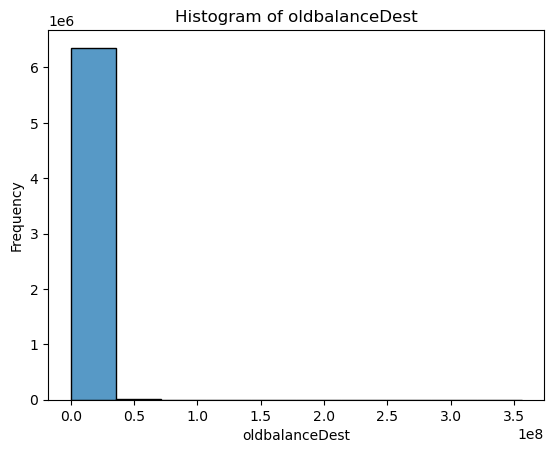

In [33]:
data = df['oldbalanceDest']

# Create histogram with 10 bins
sns.histplot(data, bins=10)

# Set the title and axis labels
plt.title("Histogram of oldbalanceDest")
plt.xlabel("oldbalanceDest")
plt.ylabel("Frequency")

# Show the plot
plt.show()

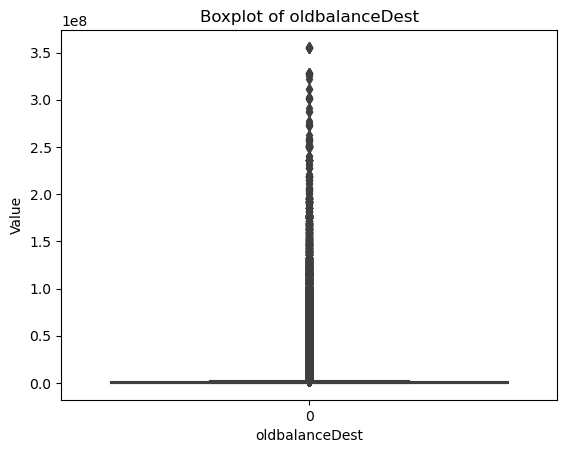

In [34]:
sns.boxplot(data=data)

# Set the title and axis labels
plt.title("Boxplot of oldbalanceDest")
plt.xlabel("oldbalanceDest")
plt.ylabel("Value")

# Show the plot
plt.show()

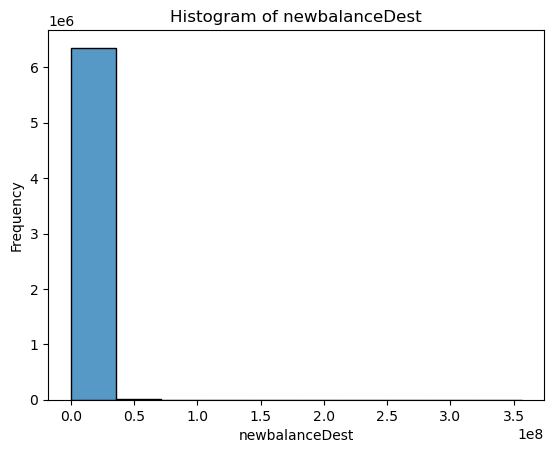

In [35]:
data = df['newbalanceDest']

# Create histogram with 10 bins
sns.histplot(data, bins=10)

# Set the title and axis labels
plt.title("Histogram of newbalanceDest")
plt.xlabel("newbalanceDest")
plt.ylabel("Frequency")

# Show the plot
plt.show()

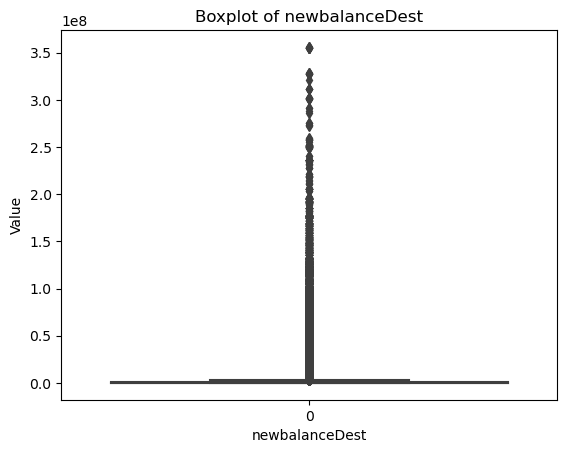

In [36]:
sns.boxplot(data=data)

# Set the title and axis labels
plt.title("Boxplot of newbalanceDest")
plt.xlabel("newbalanceDest")
plt.ylabel("Value")

# Show the plot
plt.show()

### Observations
By analysing the histogram of all the Quantitative columns we can see that all the histograms are skewed right. As we can see in the boxplot charts there are lot of outliers in all quantitative columns except for the column step.

### 2.7 Relationships between the features in the dataset

In [37]:
final_df_corr = df.corr()
print(final_df_corr)

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022391      -0.010086       -0.010322   
amount          0.022391  1.000000      -0.002906       -0.007987   
oldbalanceOrg  -0.010086 -0.002906       1.000000        0.998806   
newbalanceOrig -0.010322 -0.007987       0.998806        1.000000   
oldbalanceDest  0.027666  0.294707       0.066251        0.067817   
newbalanceDest  0.025889  0.459606       0.042037        0.041844   
isFraud         0.031551  0.076635       0.009909       -0.008352   
isFlaggedFraud  0.003277  0.012318       0.003835        0.003777   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027666        0.025889  0.031551        0.003277  
amount                0.294707        0.459606  0.076635        0.012318  
oldbalanceOrg         0.066251        0.042037  0.009909        0.003835  
newbalanceOrig        0.067817        0.041844 -0.008352        0.003777  
old

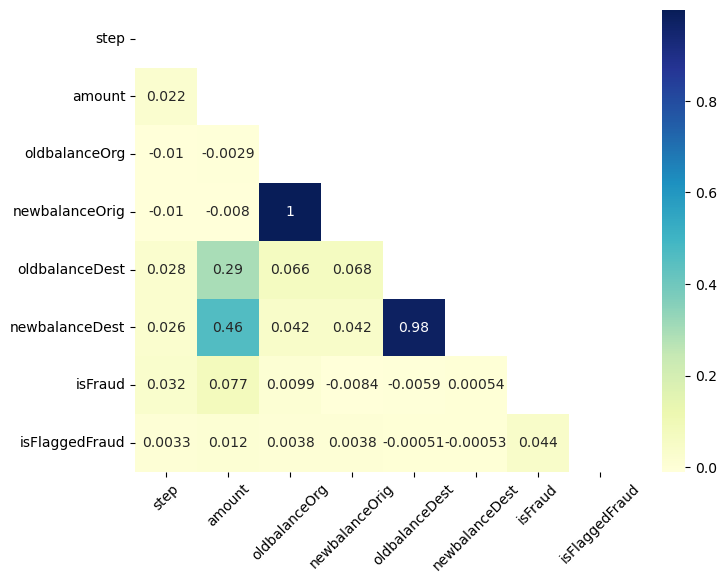

In [38]:
mask = np.triu(np.ones_like(final_df_corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(final_df_corr,annot=True, mask = mask, cmap=plt.cm.YlGnBu)
plt.xticks(rotation=45)
plt.show()

### Observations
During the analysis, amount attribute has the highest correlation with the target variable isFraud. So, this variable has been selected as the relevant training feature to predict fraud transactions.

# Part 3: Data Preparation 

### 3.1 Check for missing or incomplete data and handle it appropriately

In [39]:
df.isnull().values.any()

False

In [40]:
df.isna().sum().sort_values(ascending=False)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Observations
As we observed using isna and isnull functions that there are no empty rows in entire dataset. So, the data cleaning is not required for this dataset. However, in order to clean data we can use below techniques:

Fill missing values with mean value in quantitative columns.
For categorical columns, we can use following strategies:
- For large number of rows having missing values, we can delete the rows.
- For few number of rows having missing values we fill with highest frequency for that column.

In [41]:
# To fill quantitative columns having missing values with mean values.
cols = ['amount', 'step']
for item in cols:
    mean_val = df[item].mean()
    df[item].fillna(value=mean_val, inplace=True)

# To fill categorical columns having missing values with highest frequency.
cat_cols = ['type', 'nameOrig']
for item in cat_cols:
    highest_freq = df[item].max()
    df[item].fillna(value=highest_freq, inplace=True)

### 3.2 Data transformation to answer analytical/business questions

In [42]:
# Added new columns in the dataset
df['errorBalanceOrig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

### Observations
Motivated by the possibility of zero-balances serving to differentiate between fraudulent and genuine transactions, I created 2 new columns recording errors in originating and destination accounts for each transaction. These new columns will be highly important to improve the performance of the algorithm that will be used to detect fraud transactions.

### 3.3 Data visualization 

### Which types of transactions are fraudulent?
We can find the types of fraud transaction by plotting proportionate chart of column 'isFraud' and 'type'. With the help of pair plot we can see that transaction types 'CASH_OUT' and 'TRANSFER' have fraud transactions with 0.18 % and 0.76 % respectively.

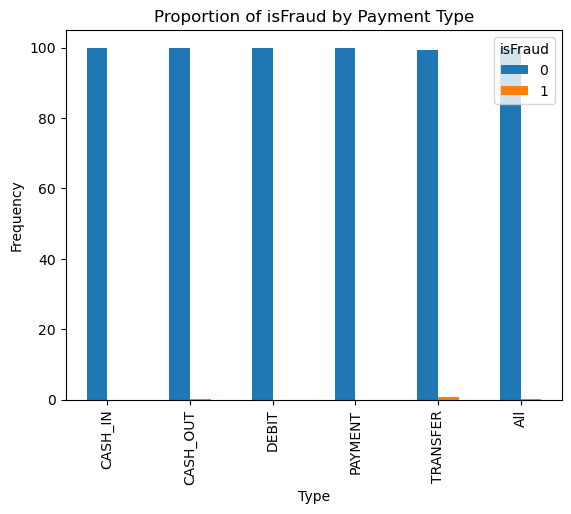

In [43]:
# Create a crosstab of Type and isFraud
cross = pd.crosstab(index=df['type'], columns=df['isFraud'], margins=True, normalize='index')*100

# Plot the crosstab as a bar chart
cross.plot(kind="bar")

# Set the chart title and axis labels
plt.title("Proportion of isFraud by Payment Type")
plt.xlabel("Type")
plt.ylabel("Frequency")

# Show the chart
plt.show()

In [44]:
# Print Crosstab dataset to check the exact values
cross

isFraud,0,1
type,,
CASH_IN,100.000000,0.000000
CASH_OUT,99.816045,0.183955
DEBIT,100.000000,0.000000
PAYMENT,100.000000,0.000000
TRANSFER,99.231758,0.768242
All,99.870965,0.129035


### What is the distribution of fraud vs non-fraud transactions in the dataset?
As we can observe in the pie chart below the percentage of fraud transactions is highly negligible as compared to non-fraud transactions. The point to note here is that fraud transactions are merely 0.1 % and non-fraud transactions are 99.9 %.

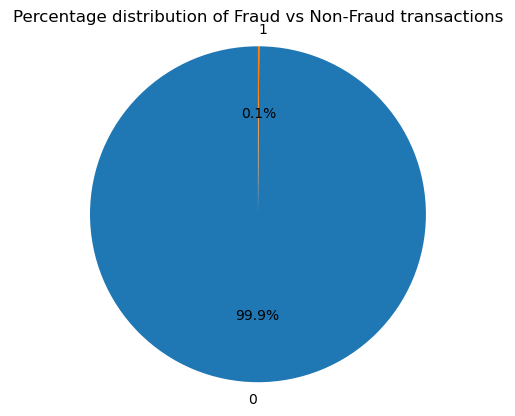

In [45]:
labels = df['isFraud'].unique()
plt.pie(df.groupby('isFraud').size(), labels=labels, autopct='%1.1f%%', startangle=90)

# Aspect ratio
plt.axis('equal')
plt.title("Percentage distribution of Fraud vs Non-Fraud transactions")

# Show plot
plt.show()

### 3.4 Reasoning for selection of plot

- For Question 1, I used a double bar chart (crosstab). Crosstabs allow us to see the distribution of fraud across different types of transactions, making it easier to identify which types of transactions have a higher incidence of fraud. By presenting the data in a tabular format, it is also easy to see the relative frequencies of each type of transaction by fraud status.

    Crosstabs are particularly useful for categorical data, as they allow for quick and easy comparisons between different categories. They also provide a clear picture of the distribution of the data, which is especially helpful when examining relationships between variables.


- For Question 2, I used a pie chart that shows the proportion of the fraud transactions in the entire dataset. The use of a pie chart allows for a quick and easy visualization of the proportion of fraud vs non-fraud transactions in the dataset. The size of the pie slice representing each type of transaction would be proportional to the number of transactions of that type. This enables us to quickly and easily understand the relative sizes of the two groups.

